In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time



100


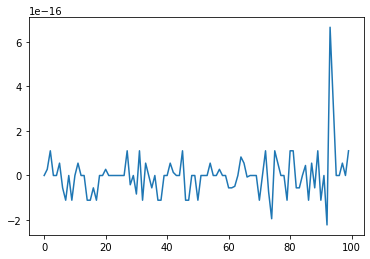

1.887357234954834


In [3]:
def solve(a, b, c, f, n):
    alpha = np.zeros(n + 1)
    beta = np.zeros(n + 1)
    for i in range(n):
        d = a[i] * alpha[i] + b[i]
        alpha[i + 1] = -c[i] / d
        beta[i + 1] = (f[i] - a[i] * beta[i]) / d
    x = np.zeros(n)
    x[n - 1] = beta[n]
    for i in range(n - 2, -1, -1):
        x[i] = alpha[i + 1] * x[i + 1] + beta[i + 1]
    return x
   
startTime = time.time()
n = int(input())
A = np.zeros((n,n)) 
a = np.random.uniform(-n, n, n)
b = np.random.uniform(-n, n, n)
c = np.random.uniform(-n, n, n)
f = np.random.uniform(-n, n, n)
a[0], c[n - 1] = 0, 0
for i in range(n):
    A[i][i] = abs(b[i])
    if i > 0:
        A[i][i - 1] = a[i]
        A[i][i] = A[i][i] + abs(a[i])
    if i < n - 1:
        A[i][i + 1] = c[i]
        A[i][i] = A[i][i] + abs(c[i])
    b[i] = A[i][i]
x = solve(a, b, c, f, n)
y = np.linalg.solve(A, f)
plt.plot(y - x)
plt.show()
print(time.time() - startTime)